# Telco Customer Churn Model
#### By TeVaughn Shaw

## Introduction
Customer churn is a very important topic to understand from a business prospective. As a business, it is important to understand why customers are leaving a certain product or service to make future improvements to the business. In this project, I will be using machine learning techniques to build a neural network that can predict the behavior to retain customers for Telco Company.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Data Exploration

To start off this project, I want to import my dataset and take a look at the different features that will be important for me to build a model. Taking a look at the features, the customerID column won't be very important in building the model so will be dropping it from model.

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4177,3470-BTGQO,Male,0,No,Yes,21,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,45.65,985.05,No
4461,0082-OQIQY,Male,0,No,No,29,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,2607.6,No
5963,7163-OCEQI,Male,0,Yes,Yes,22,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,78.65,1663.75,No
5825,1363-TXLSL,Male,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,70.3,Yes
6850,0531-XBKMM,Male,0,No,Yes,66,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.70,4378.9,No
4926,0440-EKDCF,Male,0,Yes,No,62,Yes,No,DSL,No,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),60.15,3753.2,No
5253,2851-STERV,Male,1,No,No,35,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,73.00,2471.25,No
6309,2169-RRLFW,Female,0,Yes,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.60,1888.25,No
2580,7748-UMTRK,Female,1,No,Yes,30,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,101.30,2974.5,No
673,9092-GDZKO,Male,0,No,No,22,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),24.85,493.4,No


In [12]:
df.shape

(7043, 20)

In [3]:
df.drop('customerID', axis='columns', inplace=True)
# Check datatypes of columns
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Taking a look at the 'TotalCharges' column, the datatype of the column is of type object instead of float, so I will check to see what type of object it is then convert it to float type for calculation later on.

In [4]:
# TotalCharges is showing as object instead of float
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
# TotalCharges is showing as string type
# Want to convert to float like MonthlyCharges
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

There seems to be some rows with spaces in the dataset. I want to see if there are any null values in the dataset.

In [8]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

I have found that there are a total of 11 rows in the dataset that have null values for the TotalCharges column. Below I will locate and drop the rows from the dataset which have null values and save it into a new dataframe.

In [13]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Now that null values have been removed, I can convert the TotalCharges column to numeric float value.

In [17]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [18]:
df1.TotalCharges.dtype

dtype('float64')

## Visualization

Tenure is an important column to understand how loyal the customer have been with the company. I will build a quick histogram to give a visual reference to how many tenured customers are leaving the company. With this dataset, tenure is counted by number of months as an integer.

In [22]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

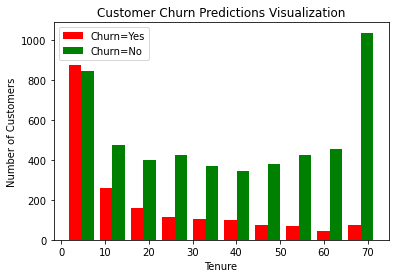

In [27]:
plt.hist([tenure_churn_yes, tenure_churn_no],color=['red', 'green'],label=['Churn=Yes', 'Churn=No'])
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Predictions Visualization")
plt.legend()

Taking a look at the histogram above I can see that customers with 60 - 70 months of tenure are less likely to leave the company than customers with less than a year's tenure with the company. Could this be due to monthly charges pricing? I will build another plot below to see where the biggest churn is occuring based on customers and monthly charge rates.

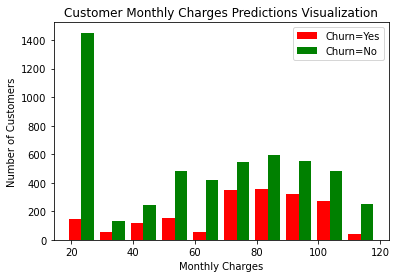

In [28]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([mc_churn_yes, mc_churn_no],color=['red', 'green'],label=['Churn=Yes', 'Churn=No'])
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Monthly Charges Predictions Visualization")
plt.legend()

## Data Cleaning

It seems that the biggest churn is occuring roughly between the 70 - 90 dollar monthly charge rates. This is great insight to know as a business as maybe more promotional rates can be offered towards these monthly charge packages. Looking back at the dataset, there are a lot of 'yes' 'no' value columns and I want to see each unique value for every column to see if it is possible to do some label encoding for the model. Below I will see each unique value entered into the 20 columns of the dataset.

In [31]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [32]:
print_unique_col_values(df1) #Categorical columns only

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Taking a look above, there are a lot of columns that have 'No internet service' & 'No phone service' option which is the same as 'No' service. To fix this, I will iterate through and change the 'No internet service' & 'No phone service' to match 'No'.

In [34]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [35]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Next, I will convert the 'Yes' 'No' columns to be either 0 or 1 to help with readability for the neural network to understand later.

In [36]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for column in yes_no_columns:
    df1[column].replace({'Yes':1, 'No':0},inplace=True)

C:\Users\S537849\Anaconda3\envs\ML\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [38]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [39]:
# will also convert gender to be either 0 or 1
df1['gender'].replace({'Female':1, 'Male':0},inplace=True)

In [40]:
df1['gender'].unique()

array([1, 0], dtype=int64)

Majority of the dataset has been cleaned, the only columns left are the ones with more than two attribute options. To fix this, I will do a One-Hot Encoding technique that build an array representation of each attribute in the column filled with zeros, except for one, which has 1 in its value to represent the correct attribute category and store into new dataframe. There are a total of three columns(InternetService, Contract, PaymentMethod) that need to be One-Hot Encoded and each column will produce 3 new columns, aside from PaymentMethod producing 4 new columns, resulting in 10 new columns being created.

In [41]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [42]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6046,1,0,0,0,9,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2084,0,0,0,1,1,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
5214,1,0,1,1,2,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0


In [43]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

## Scaling

Need to scale down three columns in the dataset(tenure, MonthlyCharges, TotalCharges) so that they are also within the 0 to 1 range. Will be using the MinMaxScaler from Scikit-learn to scale each column down between 0 and 1.

In [45]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])

In [47]:
for column in df2:
    print(f'{column} : {df2[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

## Building the Model

The dataframe is officially ready to be passed through a model. To start off the process, will split the data for training and testing. 80% of the data will be used for training, 20% will be used for testing.

In [76]:
x = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [77]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Before I split the data, there is some imbalance with the count so to handle this issue I will be using the SMOTE technique to generate new instances of synthesized data of the minority class to balance out the dataset. 

In [80]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='minority')
x, y = oversample.fit_resample(x, y)

y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

Data is now balanced and ready to be split for training and testing the model.

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=15, stratify=y)

In [82]:
x_train.shape

(8260, 26)

In [83]:
x_test.shape

(2066, 26)

In [84]:
#Viewing first 10 rows of training set
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
9322,1,1,1,0,0.428309,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3839,1,0,1,1,0.098592,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
9036,1,0,0,0,0.256704,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2633,0,0,0,0,0.718310,1,0,0,1,1,...,0,1,0,0,1,0,1,0,0,0
1842,1,0,1,1,0.760563,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6400,0,0,1,1,0.591549,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3819,1,0,1,1,0.718310,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3814,0,1,1,0,1.000000,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
10324,0,1,0,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2681,0,1,0,0,0.253521,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0


## Artificial Neural Network

In [85]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=20)

Epoch 1/20
259/259 [==============================] - 1s 773us/step - loss: 0.5244 - accuracy: 0.7439
Epoch 2/20
259/259 [==============================] - 0s 814us/step - loss: 0.4717 - accuracy: 0.7743
Epoch 3/20
259/259 [==============================] - 0s 818us/step - loss: 0.4632 - accuracy: 0.7719
Epoch 4/20
259/259 [==============================] - 0s 913us/step - loss: 0.4574 - accuracy: 0.7817
Epoch 5/20
259/259 [==============================] - 0s 777us/step - loss: 0.4528 - accuracy: 0.7829
Epoch 6/20
259/259 [==============================] - 0s 905us/step - loss: 0.4478 - accuracy: 0.7861
Epoch 7/20
259/259 [==============================] - 0s 776us/step - loss: 0.4440 - accuracy: 0.7892
Epoch 8/20
259/259 [==============================] - 0s 928us/step - loss: 0.4407 - accuracy: 0.7906
Epoch 9/20
259/259 [==============================] - 0s 767us/step - loss: 0.4381 - accuracy: 0.7933
Epoch 10/20
259/259 [==============================] - 0s 758us/step - loss: 0.434

In [86]:
model.fit(x_test,y_test)

65/65 [==============================] - 0s 826us/step - loss: 0.4459 - accuracy: 0.7890


After training the model through the entire dataset over 20 times, accuracy came out to be around 82% and after testing the model I received almost 80% which is good. Next, I will build model predictions to actual results.

## Model Predictions

In [87]:
yp = model.predict(x_test)
yp[:5]

array([[0.76328784],
       [0.05116853],
       [0.9084282 ],
       [0.95931566],
       [0.10766372]], dtype=float32)

In [88]:
# Convert yp from 2-Dimensional array to 1-Dimensional array
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [89]:
y_pred[:10]

[1, 0, 1, 1, 0, 1, 0, 1, 1, 1]

In [90]:
y_test[:10]

3045     1
4723     0
10271    1
9289     1
5026     0
3950     0
1036     1
2993     0
9954     1
1079     1
Name: Churn, dtype: int64

Comparing the first 10 model predictions to the first 10 of the actual results, I can see that the model predicted the sixth, seventh, and eighth elements wrong. This is okay since the model only has about 79% accuracy, there will be errors included with classification.

## Visualizing the Model

Text(0.5, 1.0, 'Model Results')

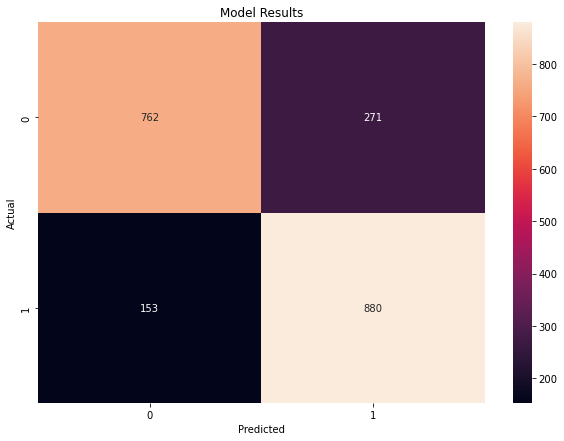

In [91]:
import seaborn as sb
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Model Results')

Based on the heatmap visualization, the model correctly classified everything on the diagonal of 879 to 249, however incorrectly classified everything else in black. This is to be expected once again since the model only has 79% accuracy rate.

## Model Classification Report

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1033
           1       0.76      0.85      0.81      1033

    accuracy                           0.79      2066
   macro avg       0.80      0.79      0.79      2066
weighted avg       0.80      0.79      0.79      2066



## Summary

Overall, I learned valuable insights to the churn rate of the Telco company. I found out that customers with less than a year tenure have a higher churn rate and the biggest churn rate falls within the 70 - 90 dollar monthly charge range. If providing this report to Telco as a company, I would suggest maybe offering promotional rates to the newer customers that fall within the monthly charge range to show that their service is valued by the company and overall influence them to stay longer with the business. After cleaning and scaling the data, I was able to build a model with nearly 80% accuracy rate. If using this model for Telco, I could save the model to make further improvements on its accuracy in the future. 

## References

[dateset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download)

“Telco Customer Churn.” Telco Customer Churn | Kaggle, www.kaggle.com, https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download.

[One-Hot Encoding](https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/)

“One-Hot Encoding in Python with Pandas and Scikit-Learn.” Stack Abuse, stackabuse.com, 1 Apr. 2020, https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/.

[imbalanced-learn](https://anaconda.org/conda-forge/imbalanced-learn)

“Imbalanced Learn :: Anaconda.Org.” Imbalanced Learn :: Anaconda.Org, anaconda.org, https://anaconda.org/conda-forge/imbalanced-learn.

[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

“Sklearn.Preprocessing.MinMaxScaler.” Scikit-Learn, scikit-learn.org, 1 Jan. 2000, https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html.

[train-test-split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

“Sklearn.Model_selection.Train_test_split.” Scikit-Learn, scikit-learn.org, 1 Jan. 2000, https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

[classification-report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

“Sklearn.Metrics.Classification_report.” Scikit-Learn, scikit-learn.org, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html.

[Imbalanced-data](https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/)

“What Is Imbalanced Data | Techniques to Handle Imbalanced Data.” Analytics Vidhya, www.analyticsvidhya.com, 21 June 2021, https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/.